Posiciones de los modelos segun su puntuacion:

1º KnnRegresor(k = 10496) = 54.11463189636876
2º KnnRegresor(default) = 897.5864424294
3º KnnRegresor( with GridSearchCV k= 3) = 944.4612969976668
4º LinealRegresor(default) = 1049.6153056103506
5º DecisionTreeRegressor(default) = 1102.272488393

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


In [65]:
df_train = pd.read_csv('train.csv')

df_train

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [92]:
colums = ['seeds', 'fruitmass', 'fruitset']

df_Tree = pd.DataFrame(df_train[colums])
df_Tree

,seeds,fruitmass,fruitset
0,39.288162,0.466183,0.579982
1,34.744180,0.413904,0.476202
2,34.159346,0.427277,0.442693
3,29.833158,0.381768,0.389453
4,44.278583,0.517160,0.633463
...,...,...,...
14995,37.033298,0.462462,0.525063
14996,29.742583,0.395636,0.384646
14997,34.702412,0.437923,0.462752
14998,37.379452,0.460369,0.517723


In [66]:
df_test = pd.read_csv('test.csv')

df_test

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,515.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.402948,0.408526,32.924021
1,15001,752.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.558394,0.479607,39.448650
2,15002,755.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.621376,0.513172,43.955361
3,15003,447.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.388819,27.442427
4,15004,269.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.511752,0.426371,33.942014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,564.0,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.378833,0.375616,29.833158
9996,24996,598.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.334594,0.392836,28.135899
9997,24997,65.0,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.525063,0.452144,36.415657
9998,24998,326.0,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.595713,0.492642,41.502482


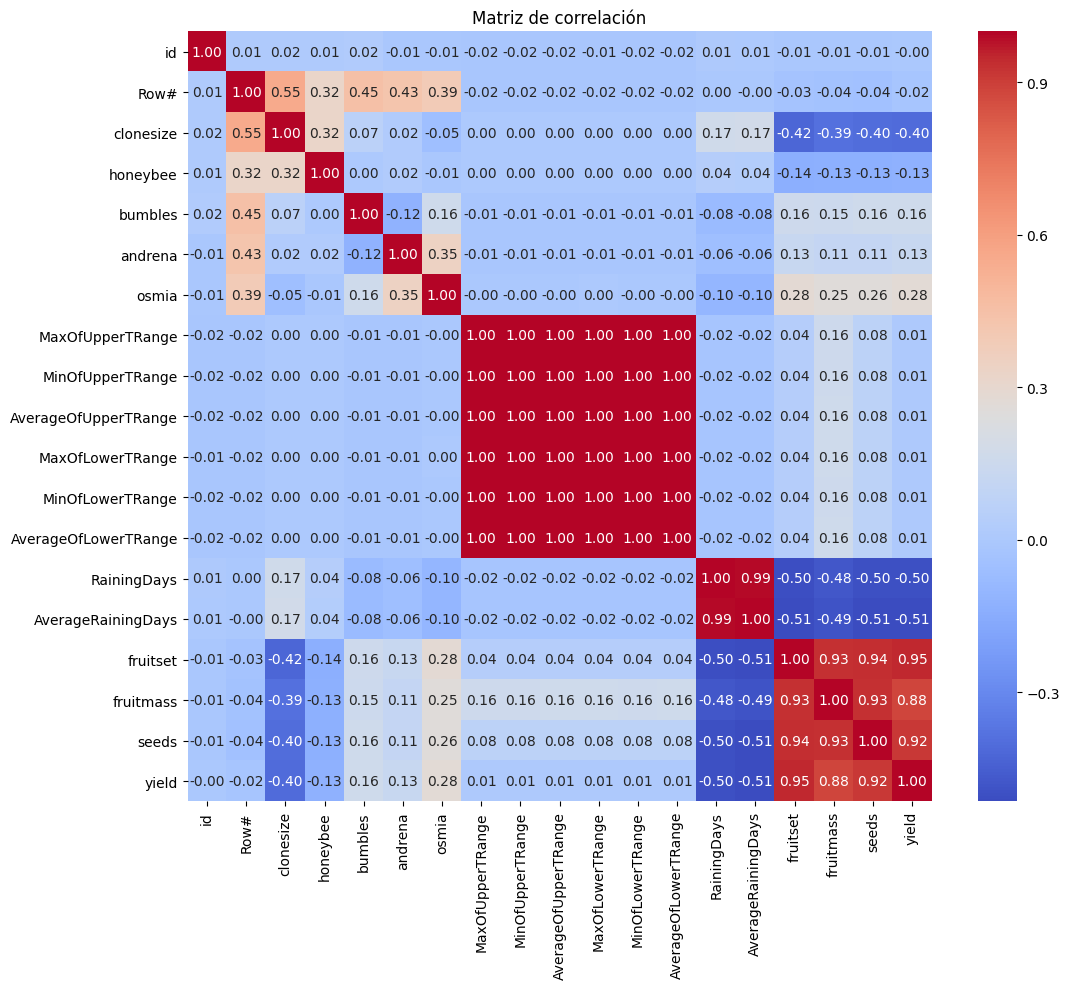

In [67]:


# Calcula la matriz de correlación
correlation_matrix = df_train.corr()

# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 10))  # Puedes cambiar los valores a tu gusto

# Dibuja el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade un título
plt.title("Matriz de correlación")

# Muestra el gráfico
plt.show()


In [68]:
"""""
for i in df_train.columns:
  for j in df_train.columns:
    if i != j and i != 'id' and j != 'id':
      plt.scatter(df_train[i], df_train[j])
      plt.xlabel(i)
      plt.ylabel(j)
      plt.show()
      print()
"""""

'""\nfor i in df_train.columns:\n  for j in df_train.columns:\n    if i != j and i != \'id\' and j != \'id\':\n      plt.scatter(df_train[i], df_train[j])\n      plt.xlabel(i)\n      plt.ylabel(j)\n      plt.show()\n      print()\n'

In [69]:
y_test = pd.read_csv('sample_submission.csv')

y_test = y_test.drop(['id'], axis=1)

y_test

,yield
0,6009.294
1,6009.294
2,6009.294
3,6009.294
4,6009.294
...,...
9995,6009.294
9996,6009.294
9997,6009.294
9998,6009.294


In [70]:
df_id = pd.DataFrame(df_test['id'])
df_id
df_train = df_train.drop(['id'], axis=1)
df_train

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [71]:
df_test = df_test.drop(['id'], axis=1)
df_test

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,515.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.402948,0.408526,32.924021
1,752.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.558394,0.479607,39.448650
2,755.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.621376,0.513172,43.955361
3,447.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.388819,27.442427
4,269.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.511752,0.426371,33.942014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,564.0,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.378833,0.375616,29.833158
9996,598.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.334594,0.392836,28.135899
9997,65.0,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.525063,0.452144,36.415657
9998,326.0,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.595713,0.492642,41.502482


In [72]:
X_train = pd.DataFrame(df_train.drop(['yield'], axis=1))


y_train = pd.DataFrame(df_train['yield'])



In [101]:
from sklearn.neighbors import KNeighborsRegressor
kneigh = KNeighborsRegressor(n_neighbors=10)
kneigh.fit(X_train, y_train)

y_pred = kneigh.predict(df_test)
y_pred_train = kneigh.predict(X_train)

y_pred

array([[4753.566393],
       [6641.611429],
       [6630.016887],
       ...,
       [6384.288949],
       [6601.837129],
       [7772.363263]])

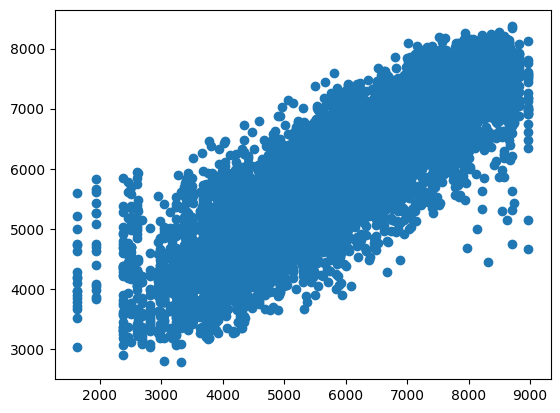

In [102]:
plt.scatter(y_train, y_pred_train)

In [95]:
df_1 = pd.DataFrame(y_pred)
df_1
print(df_1.shape, df_id.shape)
df_pred = pd.concat([df_id, df_1], axis=1)
df_pred.columns = ['id', 'yield']
df_pred
df_pred.to_csv('preddicciones.csv', index= False)
df_pred

(10000, 1) (10000, 1)


,id,yield
0,15000,4698.532170
1,15001,6319.025176
2,15002,6721.824446
3,15003,6119.446174
4,15004,5708.835524
...,...,...
9995,24995,4079.275728
9996,24996,4114.583074
9997,24997,6457.531954
9998,24998,6570.914806


In [76]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

897.5864424294

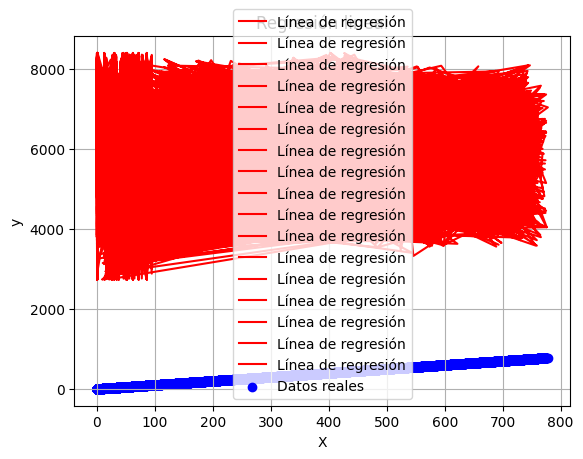

In [77]:


# Gráfico
plt.scatter(df_test, df_test, color='blue', label='Datos reales')        # puntos reales
plt.plot(df_test, y_pred, color='red', label='Línea de regresión') # línea ajustada
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión lineal')
plt.legend()
plt.grid(True)
plt.show()


In [103]:

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(1,20)}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
print(X_train)
y_pred2 = clf.predict(df_test)

KeyboardInterrupt: 

In [79]:

mean_absolute_error(y_test, y_pred2)

944.4612969976668

In [107]:
X_train = df_Tree
X_test = pd.DataFrame(df_test[colums])

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)
print(X_train)

y_pred3 = reg.predict(X_test)

           seeds  fruitmass  fruitset
0      39.288162   0.466183  0.579982
1      34.744180   0.413904  0.476202
2      34.159346   0.427277  0.442693
3      29.833158   0.381768  0.389453
4      44.278583   0.517160  0.633463
...          ...        ...       ...
14995  37.033298   0.462462  0.525063
14996  29.742583   0.395636  0.384646
14997  34.702412   0.437923  0.462752
14998  37.379452   0.460369  0.517723
14999  33.743494   0.424609  0.447041

[15000 rows x 3 columns]


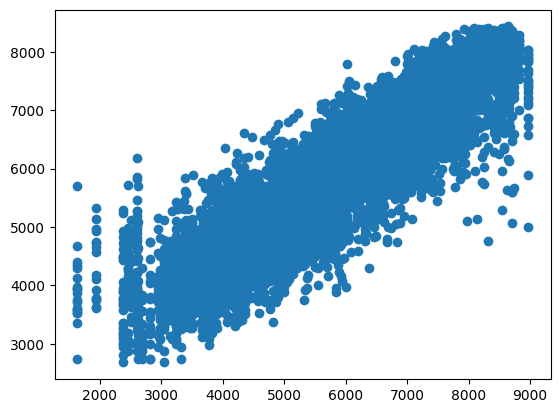

In [100]:
plt.scatter(y_train, y_pred_train)

In [110]:
df_pred['yield'] = y_pred3

df_pred

df_pred.to_csv('preddicciones3.csv', index= False)

In [81]:
mean_absolute_error(y_test, y_pred3)

1049.6153056103508

In [83]:
df_train

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


KeyError: ('seeds', 'fruitmass', 'fruitset')

In [ ]:
X_train = df_Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor(random_state=100)
 
treeRegressor.fit(X_train, y_train)

y_pred4 = treeRegressor.predict(df_test)

y_pred4

array([4476.81146, 6821.8081 , 8357.06722, ..., 6060.28382, 7570.48492,
       8440.96097])

In [96]:
df_pred['yield'] = y_pred4

df_pred

df_pred.to_csv('preddicciones2.csv', index= False)

In [ ]:
mean_absolute_error(y_test, y_pred4)

1103.450863464

In [ ]:
y_pred 

array([[6023.61904157],
       [6011.27044036],
       [6010.37055749],
       ...,
       [6077.74048097],
       [6192.76461296],
       [6197.60118663]])

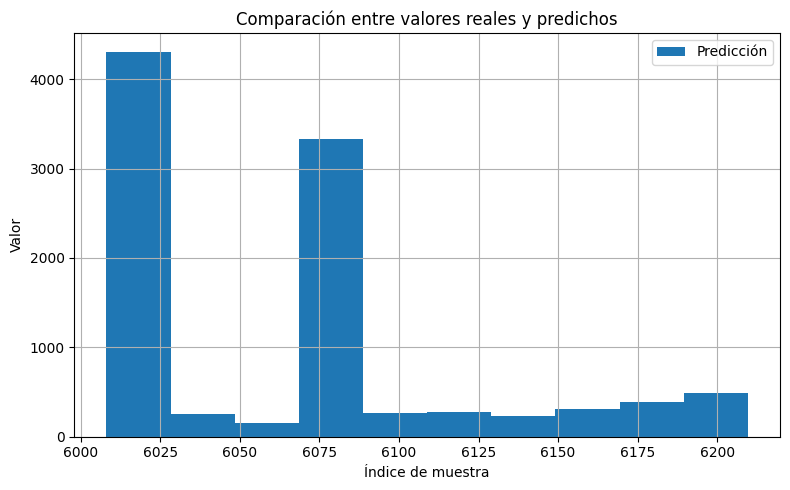

In [ ]:
import matplotlib.pyplot as plt

# Ejemplo de datos (puedes reemplazarlos por los tuyos)


# Crear el gráfico
plt.figure(figsize=(8, 5))

plt.hist(y_pred, label='Predicción')
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


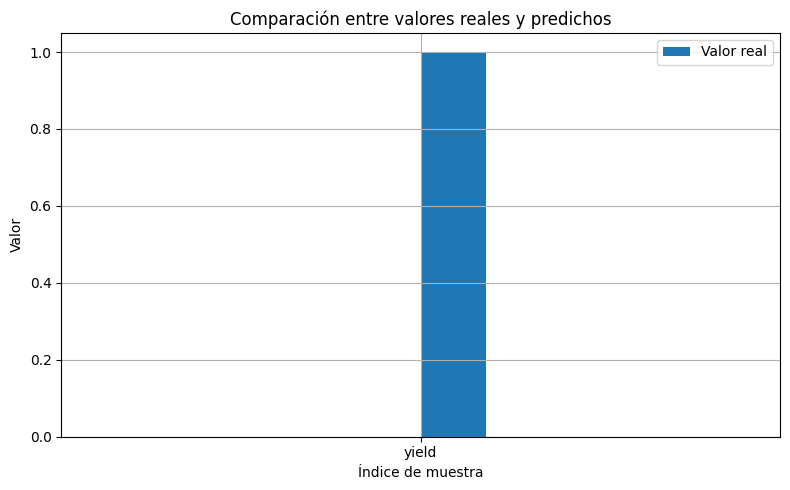

In [ ]:
# Crear el gráfico
plt.figure(figsize=(8, 5))

plt.hist(y_test, label='Valor real', )
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   -- ------------------------------------- 6.3/102.4 MB 97.2 MB/s eta 0:00:01
   --- ------------------------------------ 8.1/102.4 MB 18.7 MB/s eta 0:00:06
   -------- ------------------------------- 22.0/102.4 MB 34.0 MB/s eta 0:00:03
   -------------- ------------------------- 37.7/102.4 MB 43.6 MB/s eta 0:00:02
   ----------------------- ---------------- 60.8/102.4 MB 57.0 MB/s eta 0:00:01
   ----------------------------- ---------- 74.4/102.4 MB 58.6 MB/s eta 0:00:01
   --------------------------------- ------ 84.9/102.4 MB 58.9 MB/s eta 0:00:01
   ------------------------------------ --- 92.8/102.4 MB 54.3 MB/s eta 0:00:01
   --------------------------------------  102.2/102.4 MB 56.8 MB/s eta 0:00:01
   --------------------------------------- 102.4/102.4 MB 48.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

# =============================================================================
# 1. Cargar datos
# =============================================================================
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

# =============================================================================
# 2. Feature Engineering
# =============================================================================
# Combinar las variables de temperaturas en medias para reducir multicolinealidad
for dataset in [train_data, test_data]:
    dataset["UpperTRange_mean"] = dataset[["MaxOfUpperTRange", "MinOfUpperTRange", "AverageOfUpperTRange"]].mean(axis=1)
    dataset["LowerTRange_mean"] = dataset[["MaxOfLowerTRange", "MinOfLowerTRange", "AverageOfLowerTRange"]].mean(axis=1)
    # Diferencia en días de lluvia
    dataset["Raining_diff"] = dataset["RainingDays"] - dataset["AverageRainingDays"]

# En este ejemplo usamos el target original, aunque si la distribución de yield es muy sesgada podrías probar
# con una transformación logarítmica (y al final aplicar np.expm1 a las predicciones)
target_col = 'yield'

# Definir las features a usar
features = [
    'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
    'UpperTRange_mean', 'LowerTRange_mean',
    'Raining_diff',
    'fruitset', 'fruitmass', 'seeds'
]

# =============================================================================
# 3. División de conjuntos de entrenamiento y validación
# =============================================================================
X_train, X_val, y_train, y_val = train_test_split(
    train_data[features], train_data[target_col],
    test_size=0.2, random_state=42
)

# =============================================================================
# 4. Preprocesado con transformación robusta e interacciones
# =============================================================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            # QuantileTransformer es robusto frente a outliers y normaliza la distribución
            ('scaler', QuantileTransformer(output_distribution='normal', random_state=42)),
            # Crear interacciones de segundo grado (solo combinaciones, sin términos al cuadrado)
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
        ]), features)
    ]
)

# =============================================================================
# 5. Definir modelos base para el stacking
# =============================================================================
rf = RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_split=2,
                           min_samples_leaf=1, random_state=42, n_jobs=-1)
extrat = ExtraTreesRegressor(n_estimators=500, max_depth=6, random_state=42, n_jobs=-1)
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=4,
                   random_state=42)
lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.01, max_depth=4,
                     random_state=42, n_jobs=-1)
cat = CatBoostRegressor(iterations=500, learning_rate=0.01, depth=4,
                        random_state=42)

estimators = [
    ('rf', rf),
    ('extrat', extrat),
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('cat', cat)
]

meta_regressor = Ridge()  # Vamos a optimizar el parámetro alpha

stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_regressor,
    cv=5,
    n_jobs=-1,
    passthrough=True  # Pasa las características originales al meta-regresor
)

# =============================================================================
# 6. Pipeline final que integra el preprocesado y el modelo de stacking
# =============================================================================
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stack_reg)
])

# =============================================================================
# 7. Optimización de hiperparámetros del meta-regresor (Ridge)
# =============================================================================
param_grid = {
    'stacking__final_estimator__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0]
}

grid = GridSearchCV(pipeline, param_grid, cv=5,
                    scoring='neg_mean_absolute_error',
                    n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid.best_params_)

# =============================================================================
# 8. Evaluación en el conjunto de validación
# =============================================================================
y_val_pred = grid.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
print("MAE en validación:", mae_val)
print("MSE en validación:", mse_val)
if mae_val < 246.434024:
    print("¡Objetivo superado!")
else:
    print("Aún por mejorar. MAE:", mae_val)

# =============================================================================
# 9. Predicción final en el conjunto de test y guardado de resultados
# =============================================================================
test_pred = grid.predict(test_data[features])
output = pd.DataFrame({'id': test_data['id'], 'yield': test_pred})
output.to_csv('test_predictions_advanced_model.csv', index=False)
print("Predicciones finales guardadas en 'test_predictions_advanced_model.csv'")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros: {'stacking__final_estimator__alpha': 50.0}
MAE en validación: 241.90358055242694
MSE en validación: 131443.12018501747
¡Objetivo superado!
Predicciones finales guardadas en 'test_predictions_advanced_model.csv'


In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Asegúrate de tener definidos: X_train, y_train, X_val, y_val, test_data

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'random_state': 42
    }

    xgb = XGBRegressor(**params)
    xgb.fit(X_train, y_train)
    y_val_pred = xgb.predict(X_val)
    mae = mean_absolute_error(y_val, y_val_pred)
    return mae

# Ejecutar la optimización con Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1000)  # Puedes subir n_trials a 100 o más si quieres afinar más

# Mostrar mejores parámetros
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

# Entrenar con los mejores parámetros encontrados
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)

# Evaluar en validación
y_val_pred = best_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
print("MAE en validación:", mae_val)
print("MSE en validación:", mse_val)

# Predecir sobre el test set
test_pred = best_model.predict(test_data[features])
output = pd.DataFrame({'id': test_data['id'], 'yield': test_pred})
output.to_csv('test_predictions_advanced_model.csv', index=False)


ValueError: feature_names mismatch: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'UpperTRange_mean', 'LowerTRange_mean', 'Raining_diff', 'fruitset', 'fruitmass', 'seeds'] ['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'UpperTRange_mean', 'LowerTRange_mean', 'Raining_diff']
training data did not have the following fields: id, MinOfLowerTRange, AverageRainingDays, Row#, RainingDays, MaxOfLowerTRange, MinOfUpperTRange, AverageOfLowerTRange, AverageOfUpperTRange, MaxOfUpperTRange

In [36]:
# Predecir sobre el test set
test_pred = best_model.predict(test_data[features])


print("MAE en validación:", mae_val)
print("MSE en validación:", mse_val)
output = pd.DataFrame({'id': test_data['id'], 'yield': test_pred})
output.to_csv('test_predictions_advanced_model.csv', index=False)

MAE en validación: 240.50434953932293
MSE en validación: 130145.29922423413


In [30]:
X_train.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'UpperTRange_mean', 'LowerTRange_mean', 'Raining_diff', 'fruitset',
       'fruitmass', 'seeds'],
      dtype='object')